In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv('C:/TIMP/Prak02.csv', sep=';')
df = df.drop(['PassengerId', 'Name', 'Lname', 'Ticket', 'Cabin', 'Fare'], axis=1)
clDrop='Survived'
ydf=df[clDrop].values
df.drop(clDrop, axis=1, inplace=True)
xdf=df.values

In [51]:
Mtest=int(len(df)/4)
Mtrain=int(len(df)-Mtest)
print (len(df), Mtrain, Mtest)

156 117 39


In [52]:
ttrain = np.arange(Mtrain)
ttest = np.arange(Mtest) + Mtrain
print(ttrain)
print(ttest)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116]
[117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155]


In [53]:

dtc = tree.DecisionTreeClassifier(max_depth=8, max_features=7)
dtc = dtc.fit(xdf[ttrain], ydf[ttrain])

In [54]:
ytrainDtc = dtc.predict_proba(xdf[ttrain])
ytestDtc = dtc.predict_proba(xdf[ttest])
sc0 = dtc.score(xdf[ttrain], ydf[ttrain])
sc1 = dtc.score(xdf[ttest], ydf[ttest])
print("DesicionTree", "i_fold=", " Точность", sc0,"Точность тестовая", sc1)


DesicionTree i_fold=  Точность 0.9487179487179487 Точность тестовая 0.7948717948717948


,Pclass,Sex,Age,SibSp,Parch,Embarked,FirstClassCounter
0,3,1,22,1,0,2,0
1,1,0,38,1,0,0,1
2,3,0,26,0,0,2,0
3,1,0,35,1,0,2,1
4,3,1,35,0,0,2,0
...,...,...,...,...,...,...,...
151,1,0,22,1,0,2,1
152,3,1,"55,5",0,0,2,0
153,3,1,"40,5",0,2,2,0
154,3,1,34,0,0,2,0


In [55]:
for i in np.arange((len(ttest))):
    it = ttest[i]
    print("Пассажир", it, "Вероятности",ytestDtc[i],"Правильный ответ",ydf[i])

Пассажир 117 Вероятности [1. 0.] Правильный ответ 0
Пассажир 118 Вероятности [0. 1.] Правильный ответ 1
Пассажир 119 Вероятности [0. 1.] Правильный ответ 1
Пассажир 120 Вероятности [1. 0.] Правильный ответ 1
Пассажир 121 Вероятности [0.86666667 0.13333333] Правильный ответ 0
Пассажир 122 Вероятности [1. 0.] Правильный ответ 0
Пассажир 123 Вероятности [0. 1.] Правильный ответ 0
Пассажир 124 Вероятности [1. 0.] Правильный ответ 0
Пассажир 125 Вероятности [1. 0.] Правильный ответ 1
Пассажир 126 Вероятности [0.86666667 0.13333333] Правильный ответ 1
Пассажир 127 Вероятности [1. 0.] Правильный ответ 1
Пассажир 128 Вероятности [0. 1.] Правильный ответ 1
Пассажир 129 Вероятности [1. 0.] Правильный ответ 0
Пассажир 130 Вероятности [0.86666667 0.13333333] Правильный ответ 0
Пассажир 131 Вероятности [1. 0.] Правильный ответ 0
Пассажир 132 Вероятности [1. 0.] Правильный ответ 1
Пассажир 133 Вероятности [0. 1.] Правильный ответ 0
Пассажир 134 Вероятности [0.33333333 0.66666667] Правильный ответ 1


In [56]:
gr = np.arange(1,8,1)
gr1 = np.arange(1,12,1)
for i in gr:
    for j in gr1:
        dtc = tree.DecisionsTreeClassifier(max_depth = j,max_features=i)
        dtc = dtc.fot(xtall[ttrain], ydf[ttrain])
        ytrainDtc = dtc.predict_proba(xtall[ttrain])
        ytestDtc = dtc.predict_proba(xtall[ttest])
        sc0 = dtc.score(xtall[ttrain],ydf[ttrain])
        sc1 = dtc.score(xtall[ttest], ydf[ttest])
        print("DesicionTree nax_depth",j,"max_features",i,"Точность обучения",sc0,"Точность тестовая", sc1)

AttributeError: module 'sklearn.tree' has no attribute 'DecisionsTreeClassifier'

In [60]:
gr = np.arange(1, 8, 1)
gr1 = np.arange(1, 12, 1)
for i in gr:
    for j in gr1:
        dtc = tree.DecisionTreeClassifier(max_depth=j, max_features=i)
        dtc.fit(xdf[ttrain], ydf[ttrain])
        ytrainDtc = dtc.predict_proba(xdf[ttrain])
        ytestDtc = dtc.predict_proba(xdf[ttest])
        sc0 = dtc.score(xdf[ttrain], ydf[ttrain])
        sc1 = dtc.score(xdf[ttest], ydf[ttest])
        print("DecisionTree max_depth", j, "max_features", i, "Точность обучения", sc0, "Точность тестовая", sc1)

DecisionTree max_depth 1 max_features 1 Точность обучения 0.6495726495726496 Точность тестовая 0.46153846153846156
DecisionTree max_depth 2 max_features 1 Точность обучения 0.6495726495726496 Точность тестовая 0.48717948717948717
DecisionTree max_depth 3 max_features 1 Точность обучения 0.6666666666666666 Точность тестовая 0.6923076923076923
DecisionTree max_depth 4 max_features 1 Точность обучения 0.8034188034188035 Точность тестовая 0.8205128205128205
DecisionTree max_depth 5 max_features 1 Точность обучения 0.8632478632478633 Точность тестовая 0.7692307692307693
DecisionTree max_depth 6 max_features 1 Точность обучения 0.8290598290598291 Точность тестовая 0.717948717948718
DecisionTree max_depth 7 max_features 1 Точность обучения 0.9145299145299145 Точность тестовая 0.7692307692307693
DecisionTree max_depth 8 max_features 1 Точность обучения 0.8717948717948718 Точность тестовая 0.6923076923076923
DecisionTree max_depth 9 max_features 1 Точность обучения 0.9658119658119658 Точность т

In [64]:
    scTs = []
    scTr = []
    gr=np.arange(1,12,1)
    for i in gr:
        dtc = tree.DecisionTreeClassifier(max_depth = i,max_features = 2)
        dtc = dtc.fit(xdf[ttrain], ydf[ttrain])
        ytrainDtc = dtc.predict_proba(xdf[ttrain])
        ytestDtc = dtc.predict_proba(xdf[ttest])
        sc0 = dtc.score(xdf[ttrain], ydf[ttrain])
        sc1 = dtc.score(xdf[ttest],ydf[ttest])
        scTs.append(sc1)
        scTr.append(sc0)
        print("DesicionTree max_depth",i,"Точность обучения",sc0,"Точность тестовая",sc1)


DesicionTree max_depth 1 Точность обучения 0.8034188034188035 Точность тестовая 0.8205128205128205
DesicionTree max_depth 2 Точность обучения 0.8034188034188035 Точность тестовая 0.8205128205128205
DesicionTree max_depth 3 Точность обучения 0.7606837606837606 Точность тестовая 0.6923076923076923
DesicionTree max_depth 4 Точность обучения 0.811965811965812 Точность тестовая 0.8205128205128205
DesicionTree max_depth 5 Точность обучения 0.8461538461538461 Точность тестовая 0.8461538461538461
DesicionTree max_depth 6 Точность обучения 0.8888888888888888 Точность тестовая 0.7435897435897436
DesicionTree max_depth 7 Точность обучения 0.8974358974358975 Точность тестовая 0.7692307692307693
DesicionTree max_depth 8 Точность обучения 0.9487179487179487 Точность тестовая 0.7435897435897436
DesicionTree max_depth 9 Точность обучения 0.9316239316239316 Точность тестовая 0.7948717948717948
DesicionTree max_depth 10 Точность обучения 0.9658119658119658 Точность тестовая 0.6666666666666666
DesicionTr

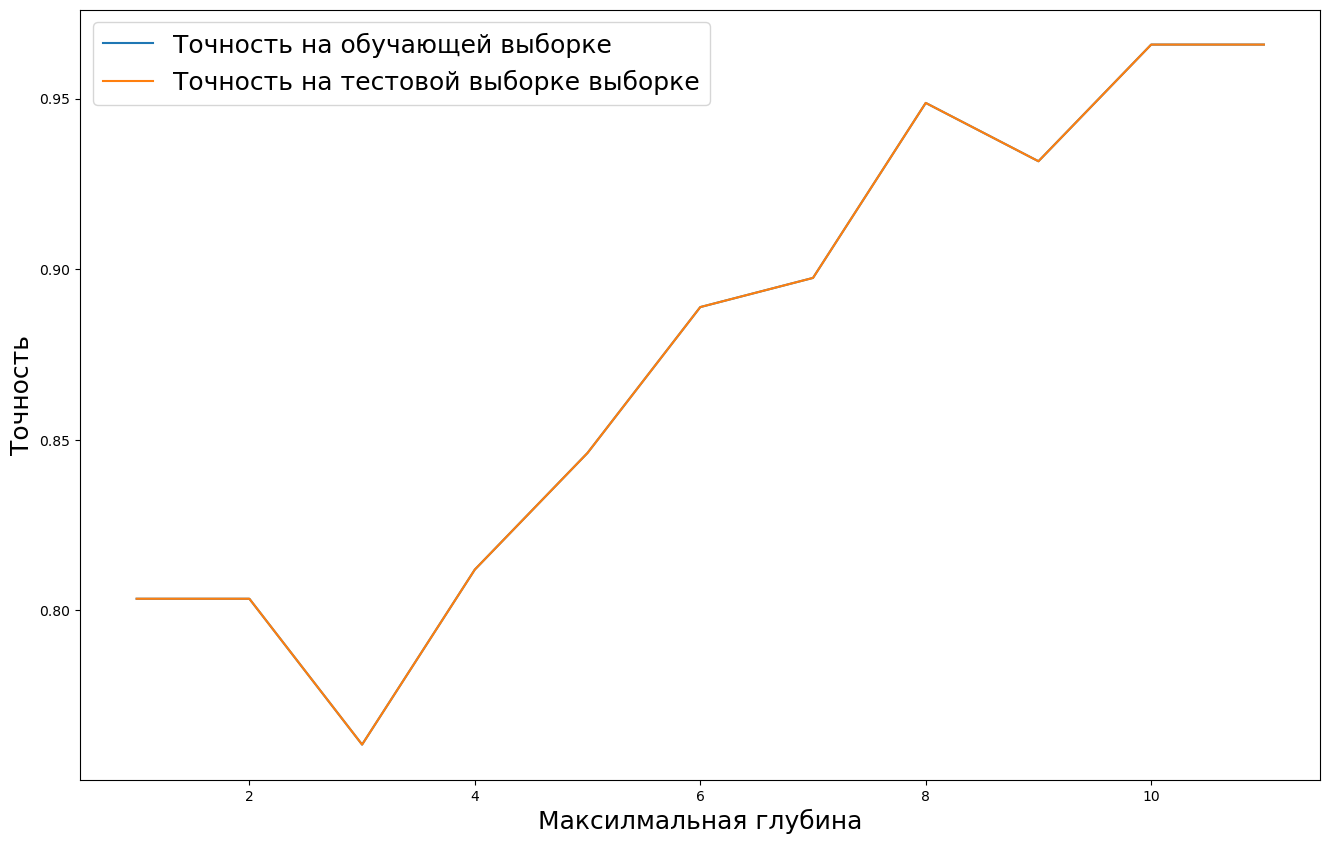

In [70]:
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.plot(gr, scTr, label='Точность на обучающей выборке')
plt.plot(gr, scTr, label='Точность на тестовой выборке выборке')
plt.xlabel('Максилмальная глубина', fontsize=18)
plt.ylabel('Точность',fontsize=18)
plt.legend(fontsize=18)
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
plt.savefig("DT_scor.jpg", dpi=400)
plt.show()

In [72]:
imp = dtc.feature_importances_
rfImp = pd.DataFrame(imp, columns=['imp'])
title1=df.columns
rfImp['title']=title1
rfImp = rfImp.sort_values('imp',ascending=False)
rfImp.head(7)

,imp,title
2,0.354859,Age
1,0.350622,Sex
3,0.092144,SibSp
5,0.077719,Embarked
0,0.073848,Pclass
4,0.050808,Parch
6,0.000000,FirstClassCounter
